In [47]:
import pandas as pd

data = pd.read_csv('dataset.csv')
data = data.sort_values(by='Attractive Level')
data

,Attractive Level,Sound,Music,Noise control,Speaking Style,Camera,Stable,Angel diversity,Images,Resolution,Color,Content,Introduction,Food description,Reviewer,Reviewer emotion,Recommendation,Clear information
105,1,2,1,2,3,3,3,0,3,4,3,1,0,0,2,1,0,0
49,1,2,3,2,3,3,4,0,3,4,3,3,1,0,2,2,0,0
90,1,2,2,2,2,1,1,1,3,4,3,3,0,1,2,3,0,1
129,1,2,1,4,2,2,2,0,3,4,2,1,0,0,2,2,0,0
103,2,2,1,3,4,3,4,1,2,4,3,2,1,0,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,5,5,5,4,5,5,5,1,5,4,5,4,1,1,5,3,1,1
39,5,5,5,5,5,5,5,1,5,5,5,5,1,1,5,3,0,1
60,5,5,5,5,5,5,5,1,5,4,5,5,1,1,5,3,1,1
75,5,5,5,4,5,5,5,1,4,4,3,4,1,0,4,3,0,1


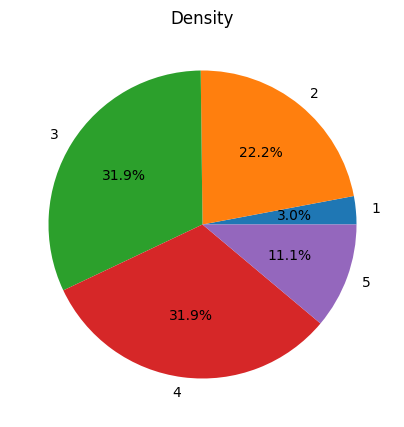

In [48]:
from matplotlib import pyplot as plt
from collections import Counter

y = data.loc[:, "Attractive Level"].tolist()
density = []
labels = []

plt.figure(figsize=(5, 5))
plt.title("Density")
for i, o in enumerate(Counter(y).values()):
    density.append(o)
    labels.append(i+1)

plt.pie(density, labels=labels, autopct='%1.1f%%', textprops={'color':"black"})
plt.show()

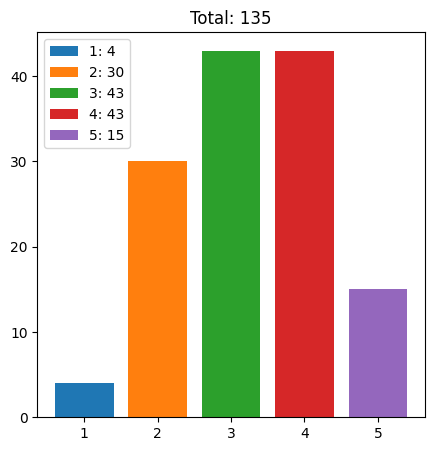

In [49]:
labels = []
count = Counter(y)
plt.figure(figsize=(5, 5))
for i in range(len(count)):
    value = count.get(i+1)
    plt.bar(i+1, value)
    labels.append(f"{i+1}: {value}")

plt.title("Total: 135")
plt.legend(labels)
plt.show()

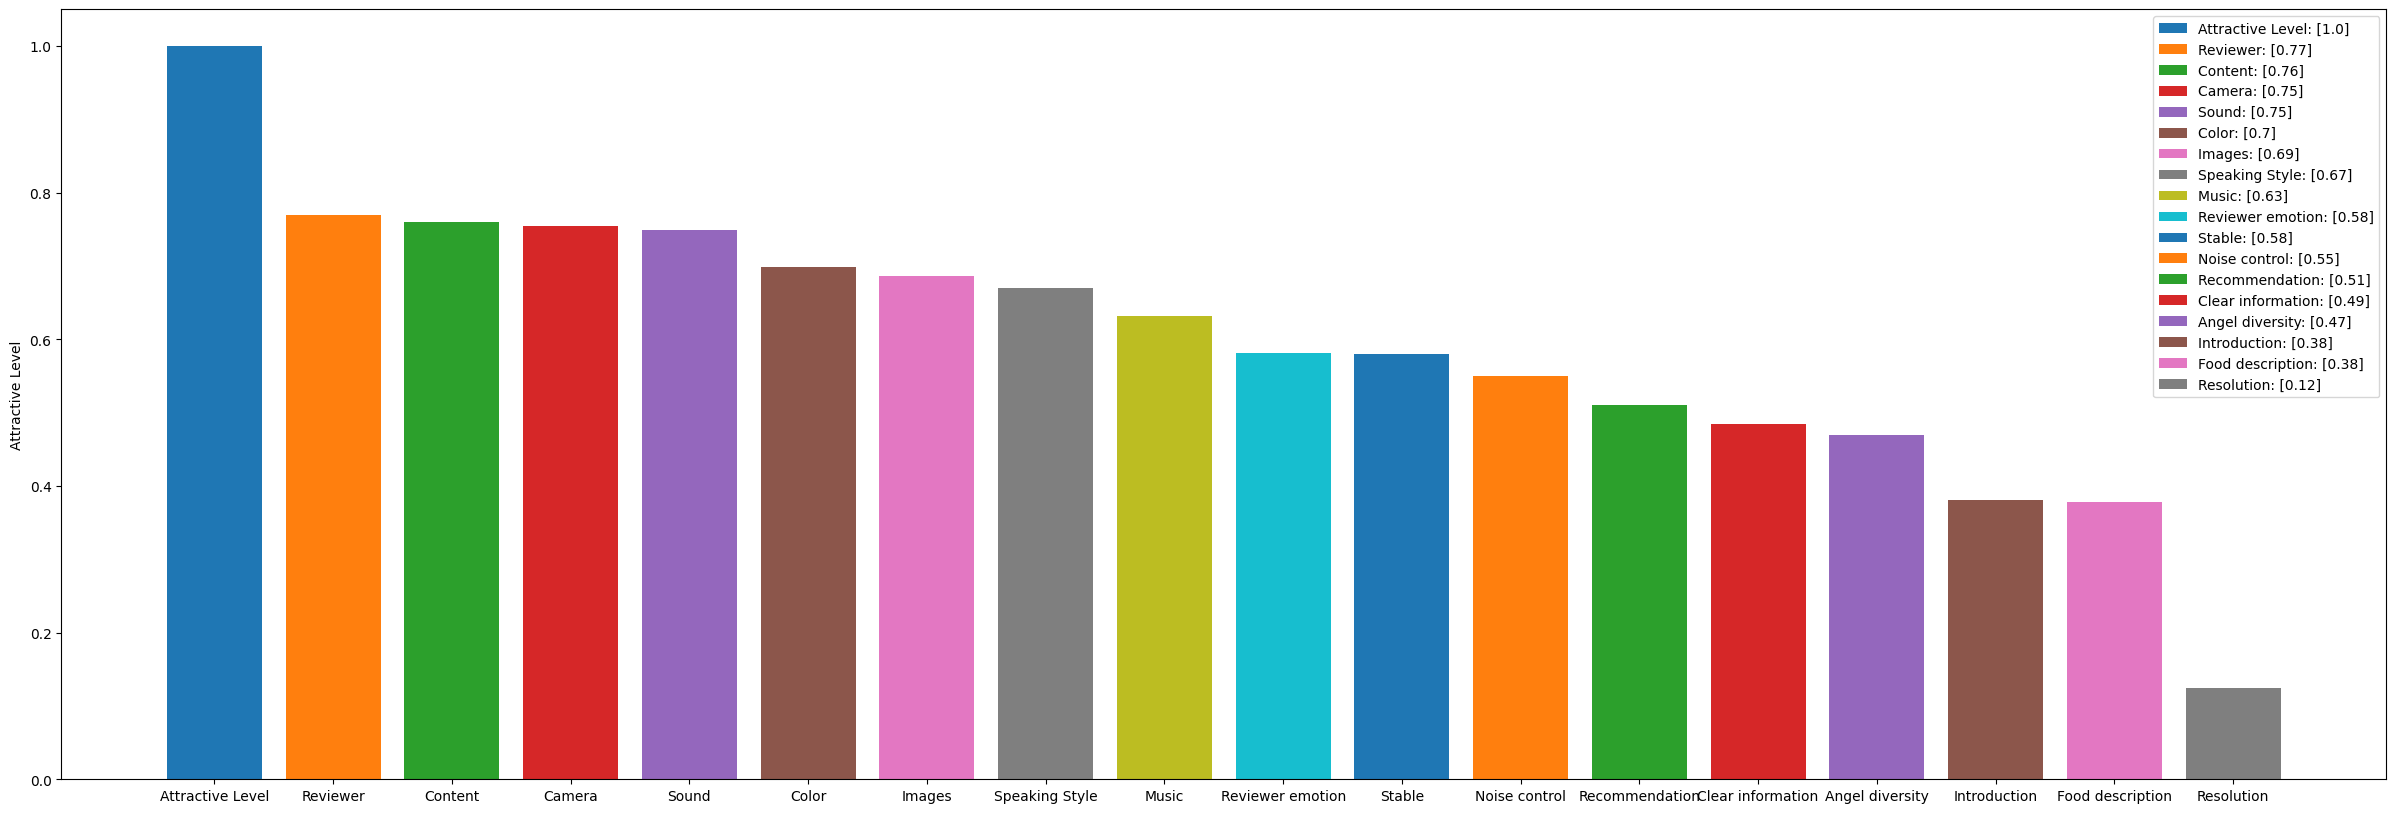

In [50]:
import numpy as np

corr = data.corr()[:1].sort_values(by ='Attractive Level', axis=1, ascending=False)

labels = []
plt.figure(figsize=(30, 10))
plt.ylabel('Attractive Level')
for i, o in enumerate(corr):
    labels.append(f"{o}: [{round(corr[o].values[0], 2)}]")
    plt.bar(str(o), corr[o].values)
plt.legend(labels)
plt.show()

In [51]:
X = data.iloc[:, 1:].values
y = data.iloc[:, :1].values

In [52]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [53]:
X

array([[-1.43349212, -1.81674682, -1.03253079, ..., -2.93715265,
        -0.74278135, -1.83162188],
       [-1.43349212, -0.10761218, -1.03253079, ..., -0.99344869,
        -0.74278135, -1.83162188],
       [-1.43349212, -0.9621795 , -1.03253079, ...,  0.95025527,
        -0.74278135,  0.54596421],
       ...,
       [ 1.84653222,  1.60152246,  1.83168134, ...,  0.95025527,
         1.3462912 ,  0.54596421],
       [ 1.84653222,  1.60152246,  0.87694396, ...,  0.95025527,
        -0.74278135,  0.54596421],
       [ 1.84653222,  1.60152246,  1.83168134, ...,  0.95025527,
         1.3462912 ,  0.54596421]])

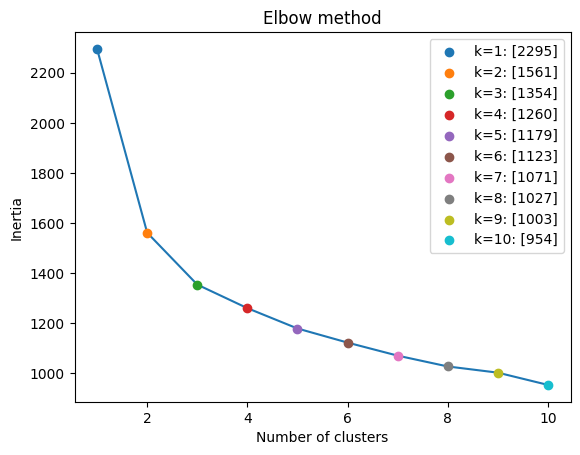

In [54]:
from sklearn.cluster import KMeans

score = []
labels = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    plt.scatter(i, kmeans.inertia_)
    score.append(kmeans.inertia_)
    labels.append(f"k={i}: [{round(kmeans.inertia_)}]")

plt.legend(labels)
plt.plot(range(1, 11), score, zorder=0)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

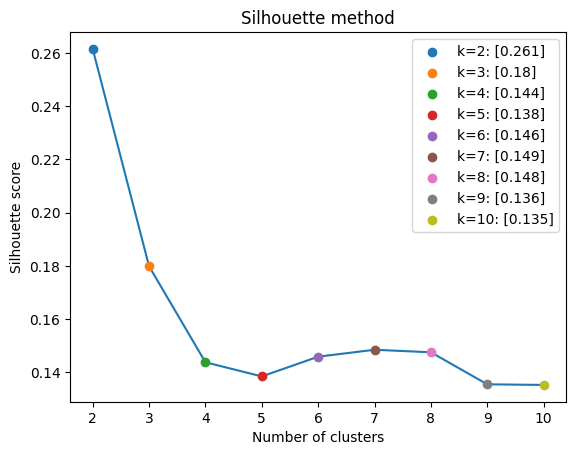

In [55]:
from sklearn.metrics import silhouette_score

score = []
labels = []
k = range(2, 11)

for i in k:
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    c = silhouette_score(X, cluster_labels)
    plt.scatter(i, c)
    score.append(c)
    labels.append(f"k={i}: [{round(c, 3)}]")

plt.legend(labels)
plt.plot(k, score, zorder=0)
plt.title('Silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

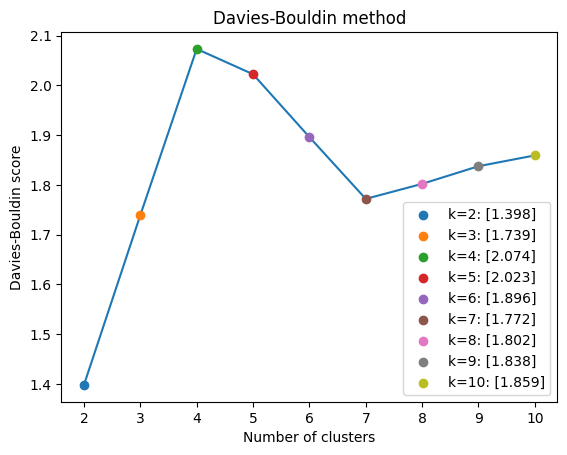

In [56]:
from sklearn.metrics import davies_bouldin_score

score = []
labels = []
k = range(2, 11)

for i in k:
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    c = davies_bouldin_score(X, cluster_labels)
    plt.scatter(i, c)
    score.append(c)
    labels.append(f"k={i}: [{round(c, 3)}]")

plt.legend(labels)
plt.plot(k, score, zorder=0)
plt.title('Davies-Bouldin method')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.show()

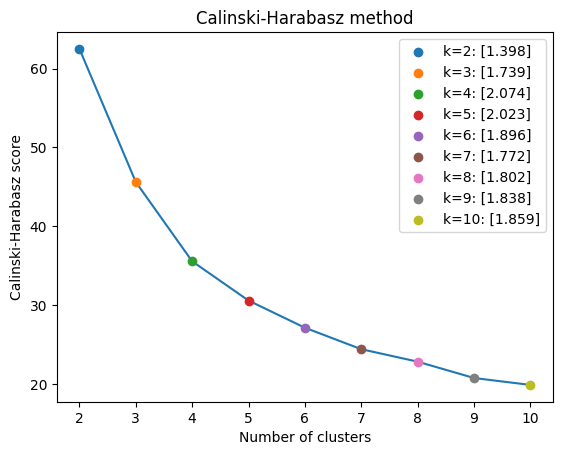

In [57]:
from sklearn.metrics import calinski_harabasz_score

score = []
k = range(2, 11)
for i in k:
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    c = calinski_harabasz_score(X, cluster_labels)
    plt.scatter(i, c)
    score.append(c)
    labels.append(f"k={i}: [{round(c, 2)}]")

plt.legend(labels)
plt.plot(k, score, zorder=0)
plt.title('Calinski-Harabasz method')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz score')
plt.show()

In [71]:
labels = ["A", "B", "C", "D", "E"]
k = range(2, 6)
for i in k:
    pred = [[] for j in range(i)]
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(X)
    for m, n in zip(y, kmeans.labels_):
        pred[n].append(m[0])

    for a, o in enumerate(pred):
        print(f"k={i}: [ {labels[a]}: {Counter(o)} ]")
        # print(f"{Counter(o)}")



k=1: [ A: Counter({3: 43, 4: 43, 2: 30, 5: 15, 1: 4}) ]
k=2: [ A: Counter({4: 41, 5: 15, 3: 5}) ]
k=2: [ B: Counter({3: 38, 2: 30, 1: 4, 4: 2}) ]
k=3: [ A: Counter({2: 23, 3: 14, 1: 4}) ]
k=3: [ B: Counter({4: 24, 5: 15, 3: 2}) ]
k=3: [ C: Counter({3: 27, 4: 19, 2: 7}) ]
k=4: [ A: Counter({2: 21, 3: 15, 1: 3}) ]
k=4: [ B: Counter({4: 25, 3: 10}) ]
k=4: [ C: Counter({4: 15, 5: 15}) ]
k=4: [ D: Counter({3: 18, 2: 9, 4: 3, 1: 1}) ]
k=5: [ A: Counter({3: 16, 2: 7, 4: 4, 1: 1}) ]
k=5: [ B: Counter({5: 14, 4: 5}) ]
k=5: [ C: Counter({3: 17, 2: 4, 4: 3}) ]
k=5: [ D: Counter({2: 19, 3: 7, 1: 3}) ]
k=5: [ E: Counter({4: 31, 3: 3, 5: 1}) ]


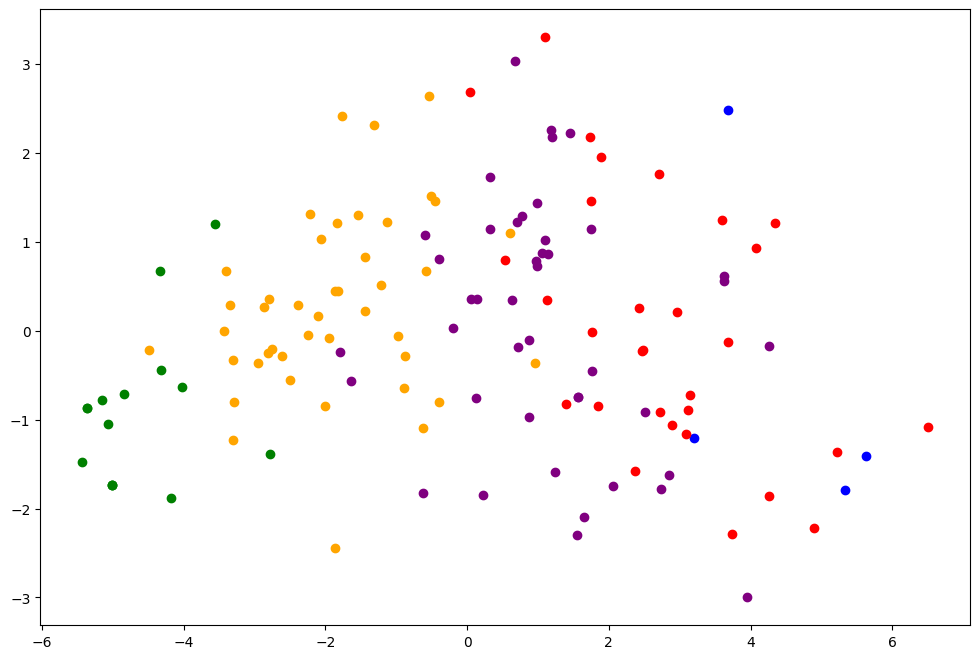

In [68]:
colors = {1: "blue", 2: "red", 3: "purple", 4: "orange", 5: "green", 6: "black", 7: "yellow", 8: "cyan", 9: "pink", 10: "lime"}

plt.figure(figsize=(12, 8))
for i, j in zip(X, y):
    plt.scatter(i[0], i[1], c=colors[j[0]])

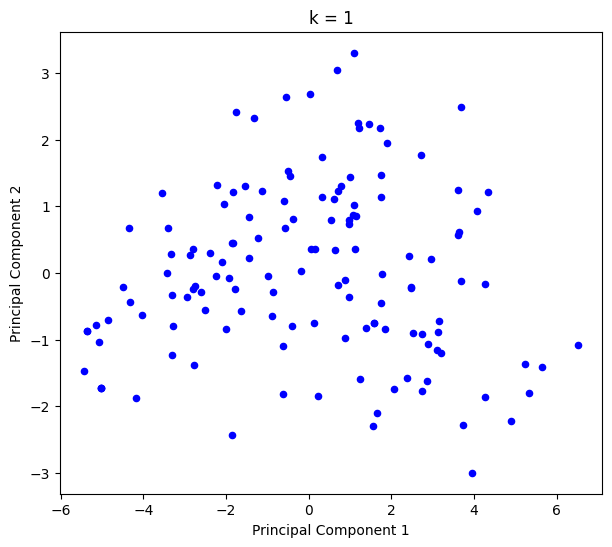

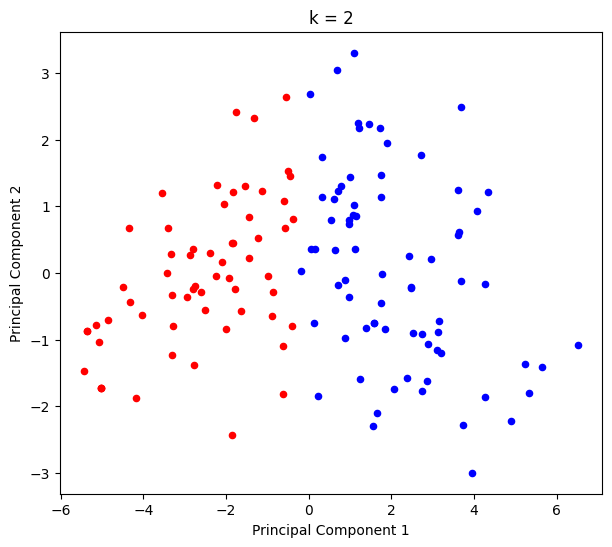

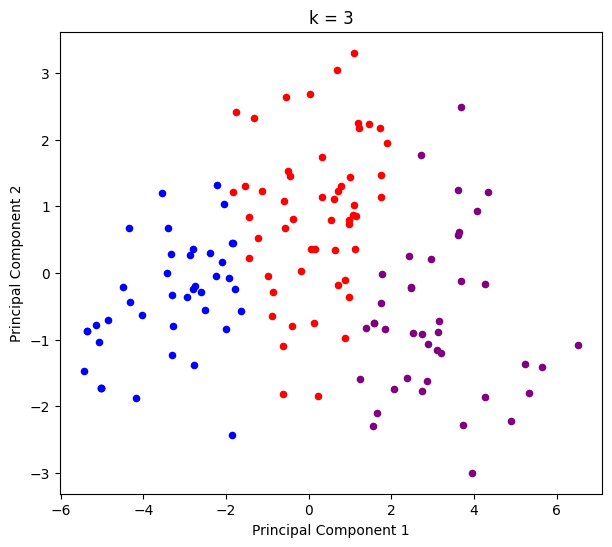

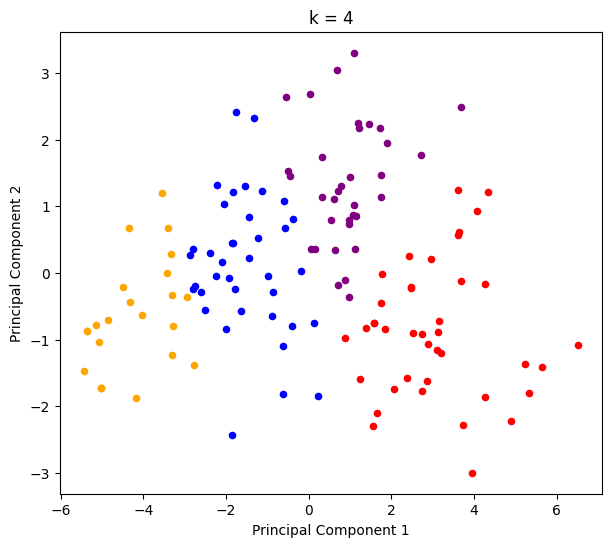

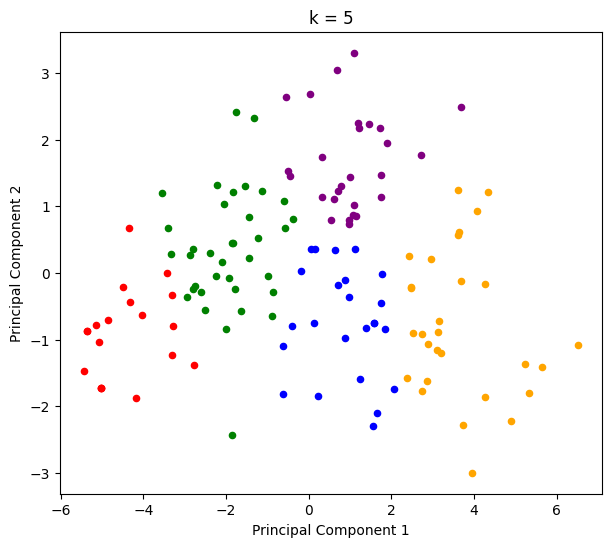

In [60]:
from k_means import PCA

pca = PCA(X, 2)
X = pca.result()

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_transform(X)

    colors = {1: "blue", 2: "red", 3: "purple", 4: "orange", 5: "green", 6: "black", 7: "yellow", 8: "cyan", 9: "pink", 10: "lime"}

    plt.figure(figsize=(7, 6))
    for i, j in zip(X, kmeans.labels_):
        plt.scatter(i[0], i[1], c=colors[j+1], s=20)

    plt.title(f"k = {k}")
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()